In [1]:
# first step heck classical scRNAseq quality control characteristics.
# first -> the distribution of the number of RNA read counts per cell
# then the distribution of the number of mit gene counts per cell

# cells with extremly high RNA read counts would indicate doublets or multiplets cell captured and sequenced together.
# the existence of cells with very high mit gene percentage would indicate degredation of the cells

# but this was not the case for the used scrnaseq library
# so no initial filtering was done on the datasset.

In [2]:
##SET UP OF THE NOTEBOOK 
# import necessary modules

import pandas as pd
import numpy as np
import os
import scipy.io
import matplotlib.pyplot as plt

input_path = "/disk2/user/hilpek/project_root/scRNAseq/input/"
output_path = "/disk2/user/hilpek/project_root/scRNAseq/output/"

##READ INPUT FILES INTO A DATAFRAME
samples = [""]

df_all_matrix = pd.DataFrame()
df_all_metadata = pd.DataFrame()

for sample in samples:
    print(f"Processing sample: {sample}")
    matrix_dir = os.path.join(input_path, sample)

    matrix = scipy.io.mmread(os.path.join(matrix_dir, "count_matrix_sparse.mtx"))

    with open(os.path.join(matrix_dir, "count_matrix_genes.tsv"), 'r') as file:
        genes = file.read().splitlines()

    with open(os.path.join(matrix_dir, "count_matrix_barcodes.tsv"), 'r') as file:
        barcodes = file.read().splitlines()

    df_matrix = pd.DataFrame.sparse.from_spmatrix(matrix)
    df_matrix.columns = barcodes
    df_matrix.index = genes
    df_matrix = df_matrix.transpose()

    metadata = pd.read_csv(os.path.join(matrix_dir, "metadata.csv"))

    df_all_matrix = pd.concat([df_all_matrix, df_matrix])
    df_all_metadata = pd.concat([df_all_metadata, metadata])

print("Matrix shape:", df_all_matrix.shape)
print("Metadata shape:", df_all_metadata.shape)



Processing sample: 
Matrix shape: (100064, 29733)
Metadata shape: (100064, 9)


In [3]:
# DATA EXPLORATION (ALL SAMPLES)
# The Obtained Dataframe
df_all_matrix

,RP11-34P13.7,FO538757.3,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP11-206L10.9,LINC00115,FAM41C,RP11-54O7.3,...,GRXCR1,RP11-63A1.2,CTD-2514K5.4,RP11-112L7.1,RP11-231G15.2,RP11-983C2.3,LINC00919,RP11-589P10.7,KRTAP9-2,IGLVIV-66-1
CID3586_AAGACCTCAGCATGAG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CID3586_AAGGTTCGTAGTACCT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CID3586_ACCAGTAGTTGTGGCC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CID3586_ACCCACTAGATGTCGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CID3586_ACTGATGGTCAACTGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CID4398_TCAGGTAGTACTCAAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CID4398_TCTATTGTCGCCATAA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CID4398_TCTTTCCCAGTAAGCG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CID4398_TGCCCATGTTACGGAG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print("number of rows/barcodes:", df_all_matrix.shape[0])
print("number of columns/genes:", df_all_matrix.shape[1])

number of rows/barcodes: 100064
number of columns/genes: 29733


In [5]:
# The Obtained Data
df_all_metadata["barcode"] = df_all_metadata["Unnamed: 0"].apply(lambda x: x.split('_')[-1])
df_all_metadata.set_index('Unnamed: 0', inplace=True)
df_all_metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,subtype,celltype_subset,celltype_minor,celltype_major,barcode
Unnamed: 0,,,,,,,,,
CID3586_AAGACCTCAGCATGAG,CID3586,4581,1689,1.506221,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial,AAGACCTCAGCATGAG
CID3586_AAGGTTCGTAGTACCT,CID3586,1726,779,5.793743,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial,AAGGTTCGTAGTACCT
CID3586_ACCAGTAGTTGTGGCC,CID3586,1229,514,1.383238,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial,ACCAGTAGTTGTGGCC
CID3586_ACCCACTAGATGTCGG,CID3586,1352,609,1.923077,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial,ACCCACTAGATGTCGG
CID3586_ACTGATGGTCAACTGT,CID3586,1711,807,13.325541,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial,ACTGATGGTCAACTGT
...,...,...,...,...,...,...,...,...,...
CID4398_TCAGGTAGTACTCAAC,CID4398,6189,1251,2.698336,ER+,Myeloid_c0_DC_LAMP3,DCs,Myeloid,TCAGGTAGTACTCAAC
CID4398_TCTATTGTCGCCATAA,CID4398,4611,719,3.057905,ER+,Myeloid_c0_DC_LAMP3,DCs,Myeloid,TCTATTGTCGCCATAA
CID4398_TCTTTCCCAGTAAGCG,CID4398,2987,887,3.682625,ER+,Myeloid_c0_DC_LAMP3,DCs,Myeloid,TCTTTCCCAGTAAGCG


In [6]:
print("number of cases:", len(df_all_metadata["orig.ident"].unique()))

number of cases: 26


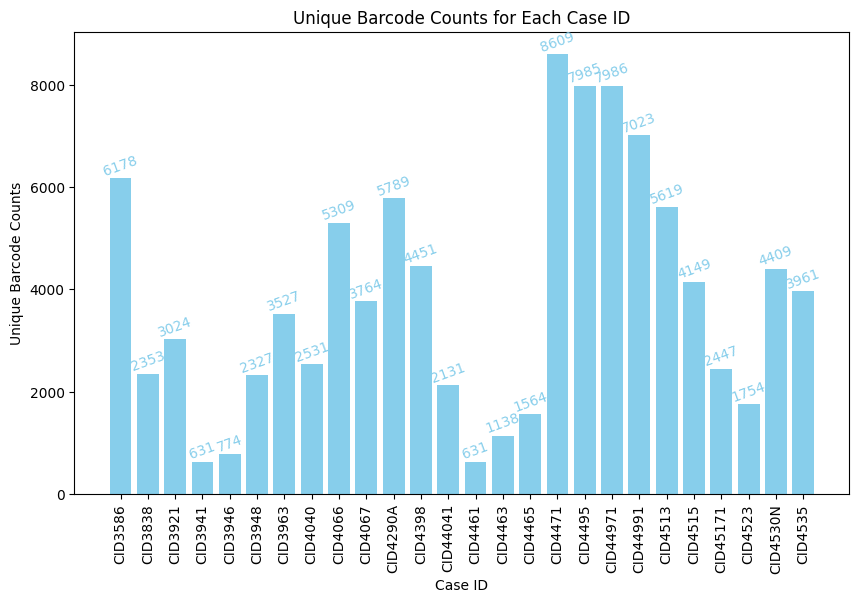

In [7]:
## BARCODES
barcode_counts = df_all_metadata.groupby('orig.ident')['barcode'].nunique().reset_index()
barcode_counts.columns = ['orig.ident', 'unique_barcodes']

# Plotting
plt.figure(figsize=(10,6))
bars = plt.bar(barcode_counts['orig.ident'], barcode_counts['unique_barcodes'], color='skyblue')
plt.title('Unique Barcode Counts for Each Case ID')
plt.xlabel('Case ID')
plt.xticks(rotation=90)
plt.ylabel('Unique Barcode Counts')

# Annotate
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', rotation=20, color='skyblue')

plt.savefig(os.path.join(output_path,"","unique_barcode_counts.pdf"), format="pdf", bbox_inches='tight')
plt.show()

In [8]:
# check if there are any repeated barcodes (no output == no issues)
for sample in df_all_metadata['orig.ident'].unique():
    df = df_all_metadata[df_all_metadata["orig.ident"]==sample]
    if len(df['barcode'].unique()) != df.shape[0]:
        print("problem: repeated barcodes in case ID", sample)

In [9]:
## RNA COUNTS PER CELL
max_value = df_all_metadata['nCount_RNA'].max()
min_value = df_all_metadata['nCount_RNA'].min()
mean_value = df_all_metadata['nCount_RNA'].mean()
median_value = df_all_metadata['nCount_RNA'].median()
std_value = df_all_metadata['nCount_RNA'].std()

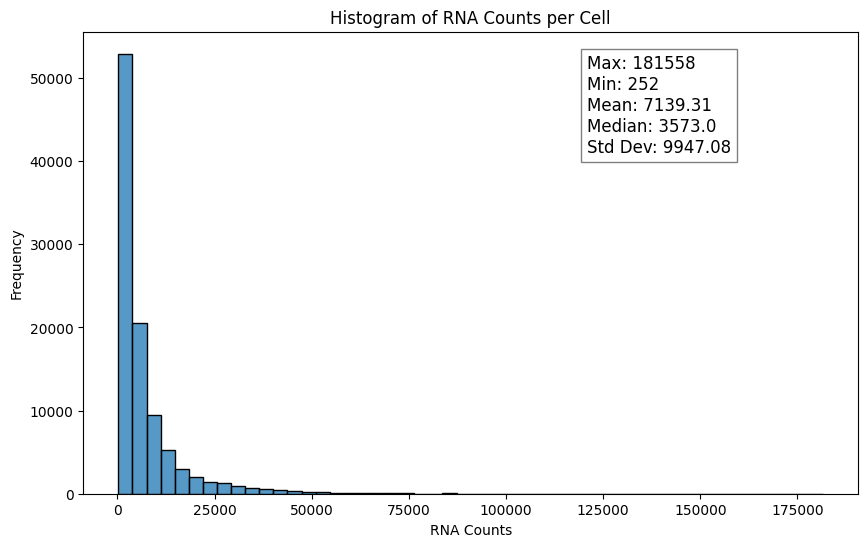

In [10]:
import seaborn as sns
# histogram 
plt.figure(figsize=(10, 6))
sns.histplot(df_all_metadata['nCount_RNA'], bins=50)
plt.title('Histogram of RNA Counts per Cell')
plt.xlabel('RNA Counts')
plt.ylabel('Frequency')

# annotate statistics
stats_text = (
    f'Max: {max_value}\n'
    f'Min: {min_value}\n'
    f'Mean: {mean_value:.2f}\n'
    f'Median: {median_value}\n'
    f'Std Dev: {std_value:.2f}'
)
plt.gca().text(0.65, 0.95, stats_text, 
               transform=plt.gca().transAxes,
               fontsize=12, verticalalignment='top',
               bbox=dict(facecolor='white', alpha=0.5))
plt.savefig(os.path.join(output_path,"", "rna_counts_per_cell_hist.pdf"), format="pdf", bbox_inches='tight')
plt.show()

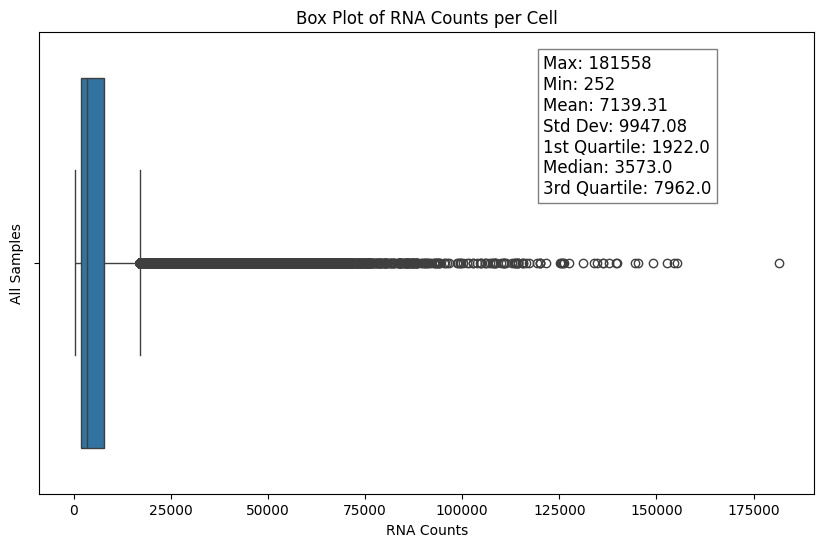

In [11]:
# box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_all_metadata['nCount_RNA'])
plt.title('Box Plot of RNA Counts per Cell')
plt.xlabel('RNA Counts')
plt.ylabel('All Samples')

# annotate statistics
stats = df_all_metadata['nCount_RNA'].describe()
stats_text = (
    f'Max: {max_value}\n'
    f'Min: {min_value}\n'
    f'Mean: {mean_value:.2f}\n'
    f'Std Dev: {std_value:.2f}\n'
    f'1st Quartile: {stats["25%"]}\n'
    f'Median: {median_value}\n'
    f'3rd Quartile: {stats["75%"]}'
)
plt.gca().text(0.65, 0.95, stats_text, 
               transform=plt.gca().transAxes,
               fontsize=12, verticalalignment='top',
               bbox=dict(facecolor='white', alpha=0.5))
plt.savefig(os.path.join(output_path,"", "rna_counts_per_cell_box.pdf"), format="pdf", bbox_inches='tight')
plt.show()



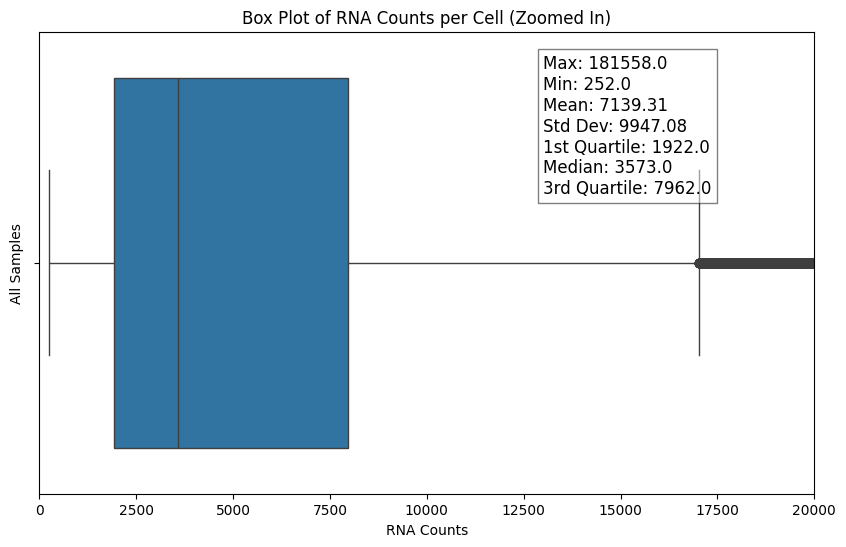

In [12]:
# Improved version: outliers are excluded with x-limit
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_all_metadata['nCount_RNA'])

plt.xlim(0, 20000)  # Cut outliers on the x-axis 
plt.title('Box Plot of RNA Counts per Cell (Zoomed In)')
plt.xlabel('RNA Counts')
plt.ylabel('All Samples')

# annotate statistics 
stats = df_all_metadata['nCount_RNA'].describe()
max_value = stats['max']
min_value = stats['min']
mean_value = stats['mean']
std_value = stats['std']
median_value = stats['50%']

stats_text = (
    f'Max: {max_value}\n'
    f'Min: {min_value}\n'
    f'Mean: {mean_value:.2f}\n'
    f'Std Dev: {std_value:.2f}\n'
    f'1st Quartile: {stats["25%"]}\n'
    f'Median: {median_value}\n'
    f'3rd Quartile: {stats["75%"]}'
)

plt.gca().text(0.65, 0.95, stats_text, 
               transform=plt.gca().transAxes,
               fontsize=12, verticalalignment='top',
               bbox=dict(facecolor='white', alpha=0.5))

plt.savefig(os.path.join(output_path, "", "rna_counts_per_cell_box_zoomed.pdf"), format="pdf", bbox_inches='tight')
plt.show()


<Axes: xlabel='orig.ident', ylabel='nCount_RNA'>

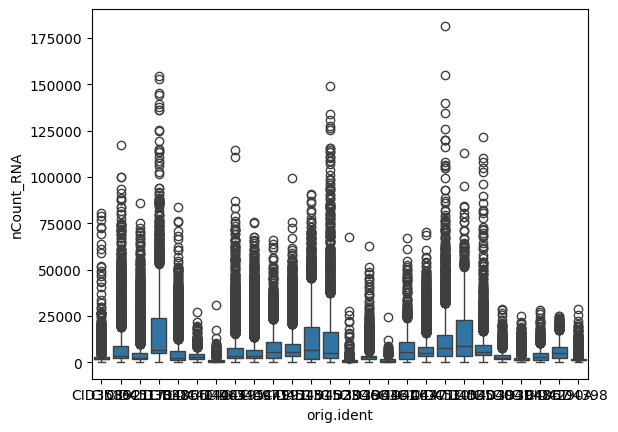

In [13]:
sns.boxplot(data=df_all_metadata, x='orig.ident', y='nCount_RNA')


In [14]:
## GENE COUNTS PER CELL
max_value = df_all_metadata['nFeature_RNA'].max()
min_value = df_all_metadata['nFeature_RNA'].min()
mean_value = df_all_metadata['nFeature_RNA'].mean()
median_value = df_all_metadata['nFeature_RNA'].median()
std_value = df_all_metadata['nFeature_RNA'].std()

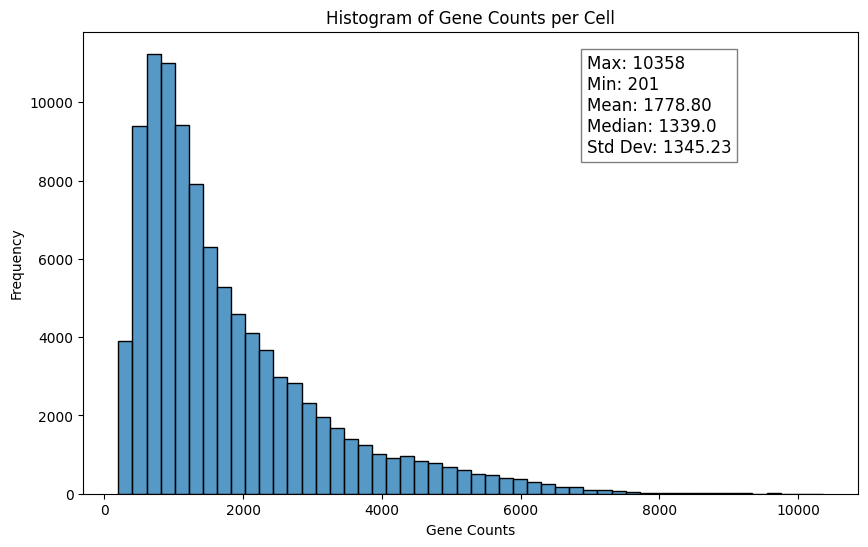

In [15]:
# histogram 
plt.figure(figsize=(10, 6))
sns.histplot(df_all_metadata['nFeature_RNA'], bins=50)
plt.title('Histogram of Gene Counts per Cell')
plt.xlabel('Gene Counts')
plt.ylabel('Frequency')

# annotate statistics
stats_text = (
    f'Max: {max_value}\n'
    f'Min: {min_value}\n'
    f'Mean: {mean_value:.2f}\n'
    f'Median: {median_value}\n'
    f'Std Dev: {std_value:.2f}'
)
plt.gca().text(0.65, 0.95, stats_text, 
               transform=plt.gca().transAxes,
               fontsize=12, verticalalignment='top',
               bbox=dict(facecolor='white', alpha=0.5))
plt.savefig(os.path.join(output_path,"", "gene_counts_per_cell_hist.pdf"), format="pdf", bbox_inches='tight')
plt.show()

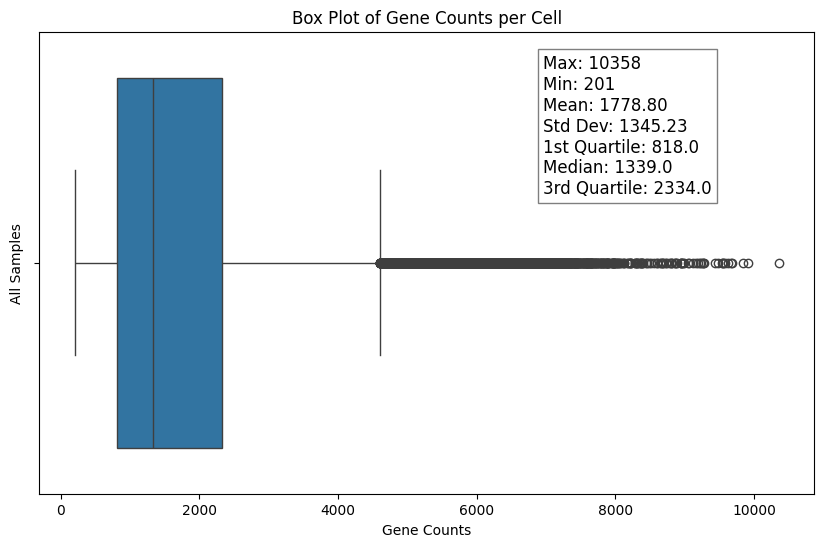

In [16]:
# box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_all_metadata['nFeature_RNA'])
plt.title('Box Plot of Gene Counts per Cell')
plt.xlabel('Gene Counts')
plt.ylabel('All Samples')

# annotate statistics
stats = df_all_metadata['nFeature_RNA'].describe()
stats_text = (
    f'Max: {max_value}\n'
    f'Min: {min_value}\n'
    f'Mean: {mean_value:.2f}\n'
    f'Std Dev: {std_value:.2f}\n'
    f'1st Quartile: {stats["25%"]}\n'
    f'Median: {median_value}\n'
    f'3rd Quartile: {stats["75%"]}'
)
plt.gca().text(0.65, 0.95, stats_text, 
               transform=plt.gca().transAxes,
               fontsize=12, verticalalignment='top',
               bbox=dict(facecolor='white', alpha=0.5))
plt.savefig(os.path.join(output_path,"", "gene_counts_per_cell_box.pdf"), format="pdf", bbox_inches='tight')
plt.show()

<Axes: xlabel='orig.ident', ylabel='nFeature_RNA'>

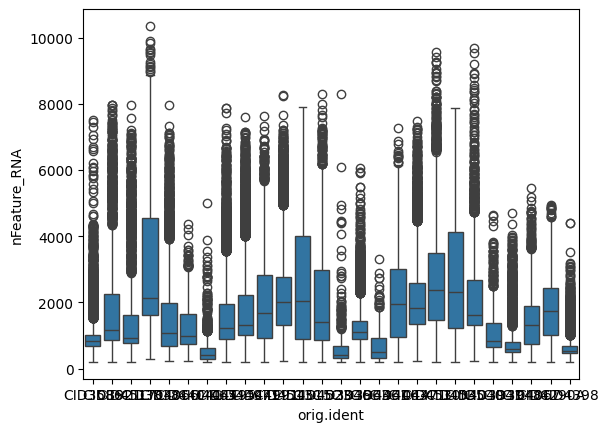

In [17]:
sns.boxplot(data=df_all_metadata, x='orig.ident', y='nFeature_RNA')

In [18]:
## MITOCHONDRIAL GENE PERCENTAGE
max_value = df_all_metadata['percent.mito'].max()
min_value = df_all_metadata['percent.mito'].min()
mean_value = df_all_metadata['percent.mito'].mean()
median_value = df_all_metadata['percent.mito'].median()
std_value = df_all_metadata['percent.mito'].std()

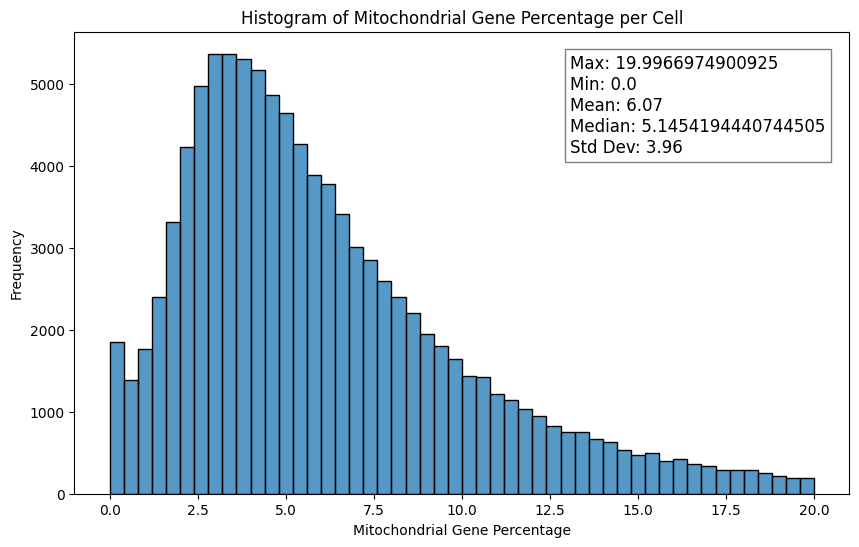

In [19]:
# histogram 
plt.figure(figsize=(10, 6))
sns.histplot(df_all_metadata['percent.mito'], bins=50)
plt.title('Histogram of Mitochondrial Gene Percentage per Cell')
plt.xlabel('Mitochondrial Gene Percentage')
plt.ylabel('Frequency')

# annotate statistics
stats_text = (
    f'Max: {max_value}\n'
    f'Min: {min_value}\n'
    f'Mean: {mean_value:.2f}\n'
    f'Median: {median_value}\n'
    f'Std Dev: {std_value:.2f}'
)
plt.gca().text(0.64, 0.95, stats_text, 
               transform=plt.gca().transAxes,
               fontsize=12, verticalalignment='top',
               bbox=dict(facecolor='white', alpha=0.5))
plt.savefig(os.path.join(output_path,"", "mitochondrial_gene_percentage_per_cell.pdf"), format="pdf", bbox_inches='tight')
plt.show()

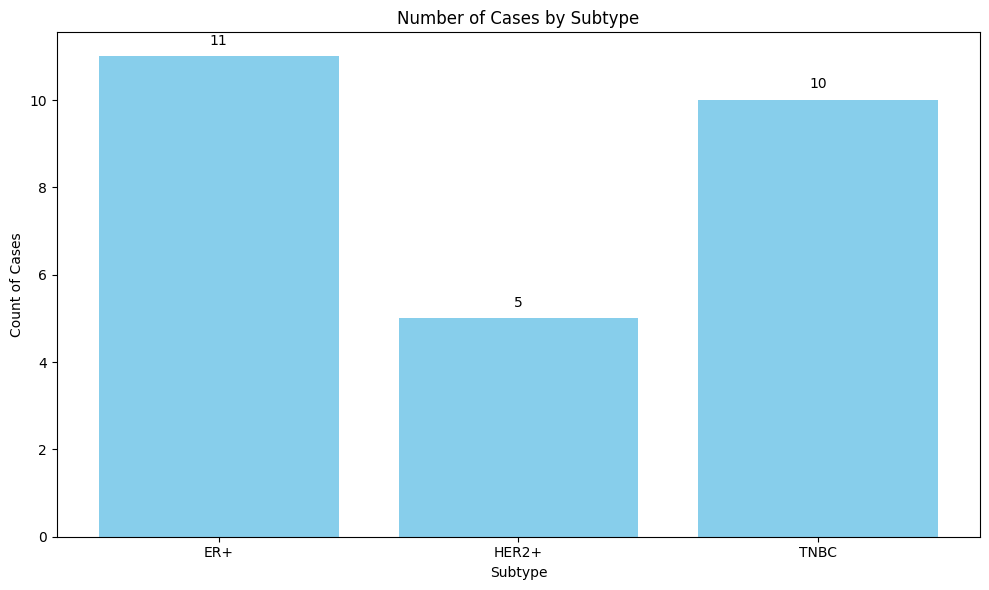

In [20]:
## SUBTYPE DISTRIBUTION
# Filter unique entries based on subtype and count Case IDs (orig.ident)
unique_counts = df_all_metadata.groupby('subtype')['orig.ident'].nunique()

# bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_counts.index, unique_counts, color='skyblue')
plt.title('Number of Cases by Subtype')
plt.xlabel('Subtype')
plt.ylabel('Count of Cases')

# annotate
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom')
plt.savefig(os.path.join(output_path,"", "subtype_dist.pdf"), format="pdf", bbox_inches='tight')
plt.tight_layout()
plt.show()

In [21]:
## Cell Type Distributions
# all major cell types in the dataset
df_all_metadata["celltype_major"].unique()

array(['Endothelial', 'CAFs', 'PVL', 'B-cells', 'T-cells', 'Myeloid',
       'Normal Epithelial', 'Plasmablasts', 'Cancer Epithelial'],
      dtype=object)

In [22]:
# all minor cell types in the dataset
df_all_metadata["celltype_minor"].unique()

array(['Endothelial ACKR1', 'Endothelial RGS5', 'Endothelial CXCL12',
       'CAFs MSC iCAF-like', 'CAFs myCAF-like', 'PVL Differentiated',
       'PVL Immature', 'Endothelial Lymphatic LYVE1', 'B cells Memory',
       'B cells Naive', 'T cells CD8+', 'T cells CD4+', 'NK cells',
       'Cycling T-cells', 'NKT cells', 'Macrophage', 'Monocyte',
       'Cycling_Myeloid', 'DCs', 'Myoepithelial', 'Luminal Progenitors',
       'Mature Luminal', 'Plasmablasts', 'Cancer Cycling',
       'Cancer Her2 SC', 'Cancer LumB SC', 'Cancer Basal SC',
       'Cycling PVL', 'Cancer LumA SC'], dtype=object)

In [23]:
# all cell type subsets in the dataset
df_all_metadata["celltype_subset"].unique()

array(['Endothelial ACKR1', 'Endothelial RGS5', 'Endothelial CXCL12',
       'CAFs MSC iCAF-like s1', 'CAFs MSC iCAF-like s2',
       'CAFs Transitioning s3', 'CAFs myCAF like s4',
       'CAFs myCAF like s5', 'PVL Differentiated s3', 'PVL_Immature s2',
       'PVL Immature s1', 'Endothelial Lymphatic LYVE1', 'B cells Memory',
       'B cells Naive', 'T_cells_c4_CD8+_ZFP36', 'T_cells_c6_IFIT1',
       'T_cells_c5_CD8+_GZMK', 'T_cells_c7_CD8+_IFNG',
       'T_cells_c8_CD8+_LAG3', 'T_cells_c0_CD4+_CCR7',
       'T_cells_c1_CD4+_IL7R', 'T_cells_c2_CD4+_T-regs_FOXP3',
       'T_cells_c3_CD4+_Tfh_CXCL13', 'T_cells_c9_NK_cells_AREG',
       'T_cells_c11_MKI67', 'T_cells_c10_NKT_cells_FCGR3A',
       'Myeloid_c10_Macrophage_1_EGR1', 'Myeloid_c12_Monocyte_1_IL1B',
       'Myeloid_c2_LAM2_APOE', 'Myeloid_c1_LAM1_FABP5',
       'Myeloid_c8_Monocyte_2_S100A9', 'Myeloid_c7_Monocyte_3_FCGR3A',
       'Myeloid_c9_Macrophage_2_CXCL10', 'Cycling_Myeloid',
       'Myeloid_c11_cDC2_CD1C', 'Myeloid_c4_DC

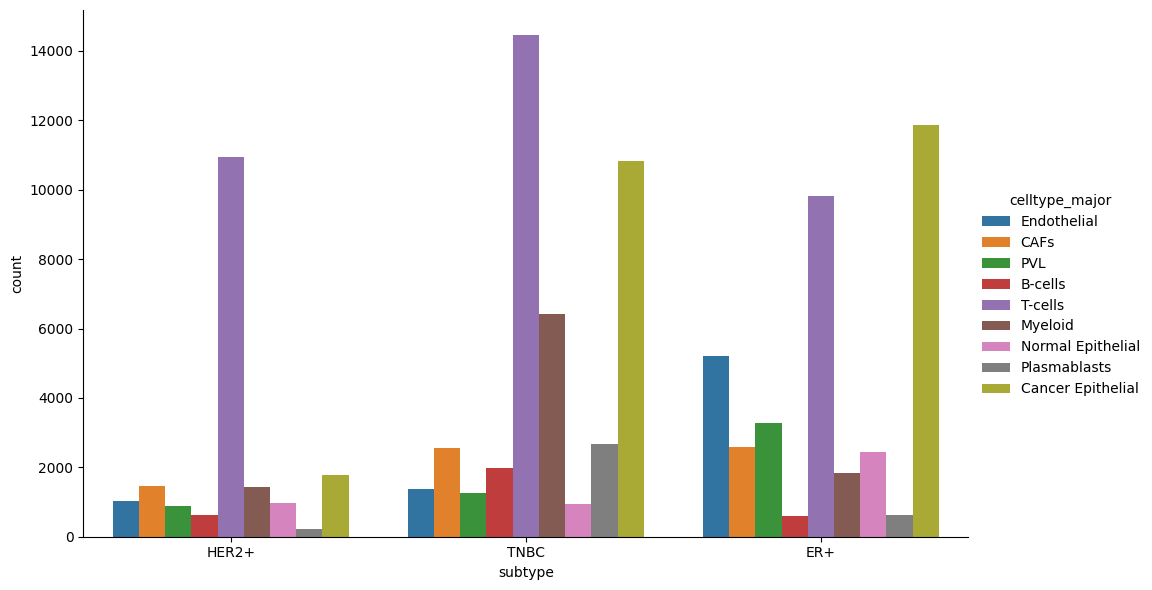

In [24]:
sns.catplot(data=metadata, x="subtype", hue="celltype_major", 
                 kind="count", height=6, aspect=10/6).set_titles("Cell Type Distributions among Subtypes")
plt.savefig(os.path.join(output_path,"", "cell_type_dist_per_subtype.pdf"), format="pdf", bbox_inches='tight')

In [25]:
# we will focus on ER+ patients
# the most common cell types are seen as cancer epithelial cells and T-cells in the scRNA-seq library.
